In [1]:
import xarray as xr

# Load both datasets
original = xr.open_dataset("results/groundwater_storage_anomalies.nc")
enhanced = xr.open_dataset("results/groundwater_storage_anomalies_enhanced.nc")

# Calculate difference statistics
diff = enhanced.groundwater - original.groundwater
print(f"Mean absolute difference: {abs(diff).mean().values}")
print(f"Max absolute difference: {abs(diff).max().values}")
print(f"Relative difference: {(abs(diff).mean() / abs(original.groundwater).mean()).values * 100}%")

Mean absolute difference: 3.354907306676269
Max absolute difference: 44.2225752825642
Relative difference: 5.980050234782984%


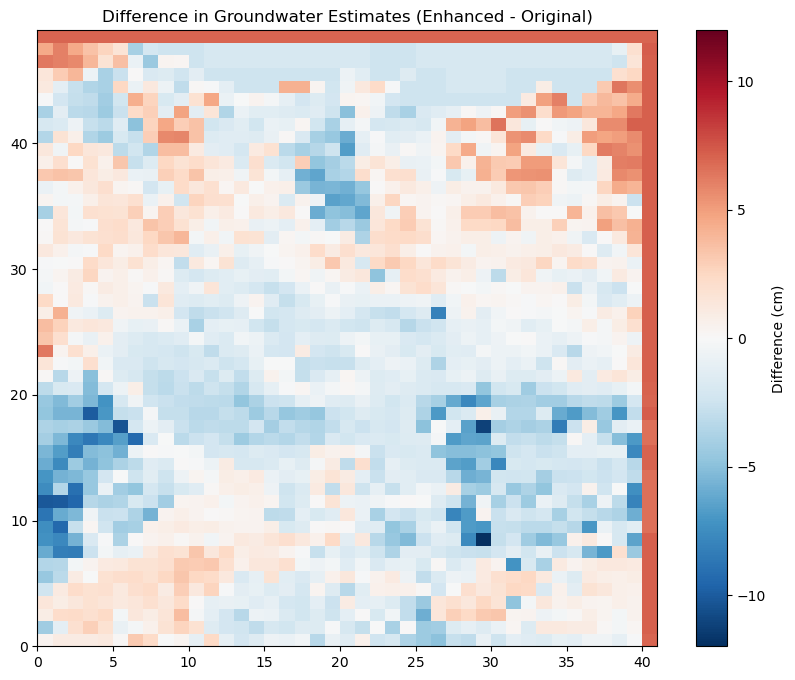

In [2]:
import matplotlib.pyplot as plt
from matplotlib.colors import TwoSlopeNorm

# Sample time point (adjust to a specific date of interest)
time_index = 10

# Calculate difference
diff = enhanced.groundwater.isel(time=time_index) - original.groundwater.isel(time=time_index)

# Plot
plt.figure(figsize=(10, 8))
vmax = abs(diff).max()
norm = TwoSlopeNorm(vmin=-vmax, vcenter=0, vmax=vmax)
plt.pcolormesh(diff, cmap='RdBu_r', norm=norm)
plt.colorbar(label='Difference (cm)')
plt.title(f'Difference in Groundwater Estimates (Enhanced - Original)')
plt.savefig('figures/groundwater_difference.png', dpi=300)

In [1]:
import xarray as xr
ds = xr.open_dataset('data/processed/feature_stack.nc')
print("Dataset variables:", list(ds.data_vars.keys()))
if 'static_features' in ds:
    print("Static features shape:", ds.static_features.shape)
    print("Static feature names:", ds.static_feature.values)
else:
    print("No static features found!")

Dataset variables: ['features', 'static_features']
Static features shape: (15, 49, 41)
Static feature names: ['modis_land_cover' 'usgs_dem' 'landscan_population' 'sand_0cm' 'clay_0cm'
 'sand_10cm' 'clay_10cm' 'sand_30cm' 'clay_30cm' 'sand_60cm' 'clay_60cm'
 'sand_100cm' 'clay_100cm' 'sand_200cm' 'clay_200cm']
